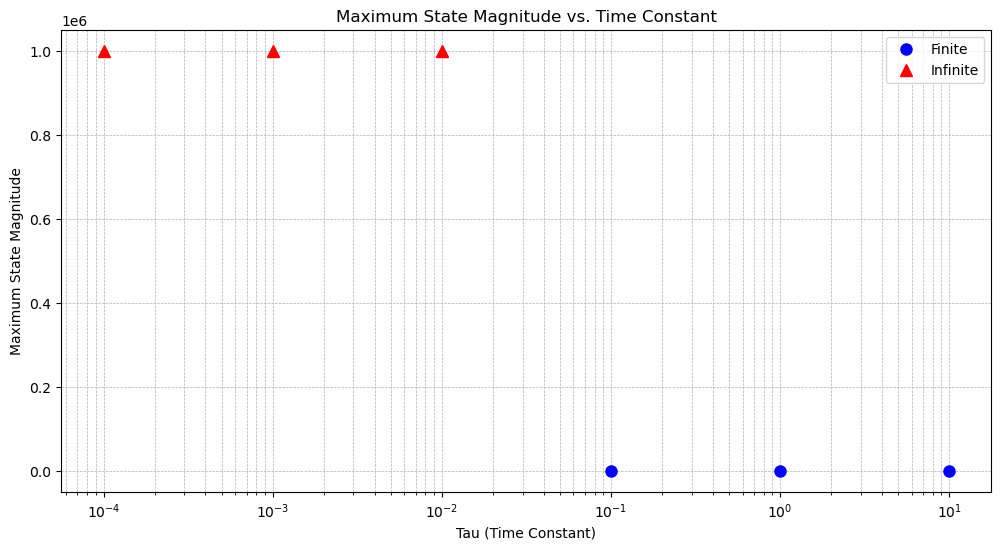

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def system_dynamics(x, u, tau, dt, noise_amplitude):
    """Computes the next state of the system with added noise."""
    dx = (-x/tau) + u + np.random.normal(0, noise_amplitude)
    return x + dx * dt

def committee_decision(x, threshold, delta_u, u):
    """Committee adjusts the control input u based on state x."""
    if x < threshold:
        return u + delta_u
    else:
        return u - delta_u

# Parameters
T = 2.0
delta_u = 0.1
dt = 0.1
total_time = 600
committee_decision_interval = 60
noise_amplitude = 1.5

tau_values = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
max_magnitudes = []

for tau in tau_values:
    x = 0.0
    u = 0.0
    max_value = 0.0

    for i in range(int(total_time / dt)):
        if i % int(committee_decision_interval / dt) == 0:
            u = committee_decision(x, T, delta_u, u)
        
        x = system_dynamics(x, u, tau, dt, noise_amplitude)
        max_value = max(max_value, abs(x))

    max_magnitudes.append(max_value)

# Plotting
plt.figure(figsize=(12, 6))

inf_replacement = 10e5  # Large value to replace infinity for plotting
for tau, mag in zip(tau_values, max_magnitudes):
    if np.isfinite(mag):
        plt.semilogx(tau, mag, 'bo', markersize=8) 
    else:
        plt.semilogx(tau, inf_replacement, 'r^', markersize=8)

# Add dummy plots for legend entries
plt.plot([], [], 'bo', markersize=8, label="Finite")
plt.plot([], [], 'r^', markersize=8, label="Infinite")

plt.title("Maximum State Magnitude vs. Time Constant")
plt.xlabel("Tau (Time Constant)")
plt.ylabel("Maximum State Magnitude")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

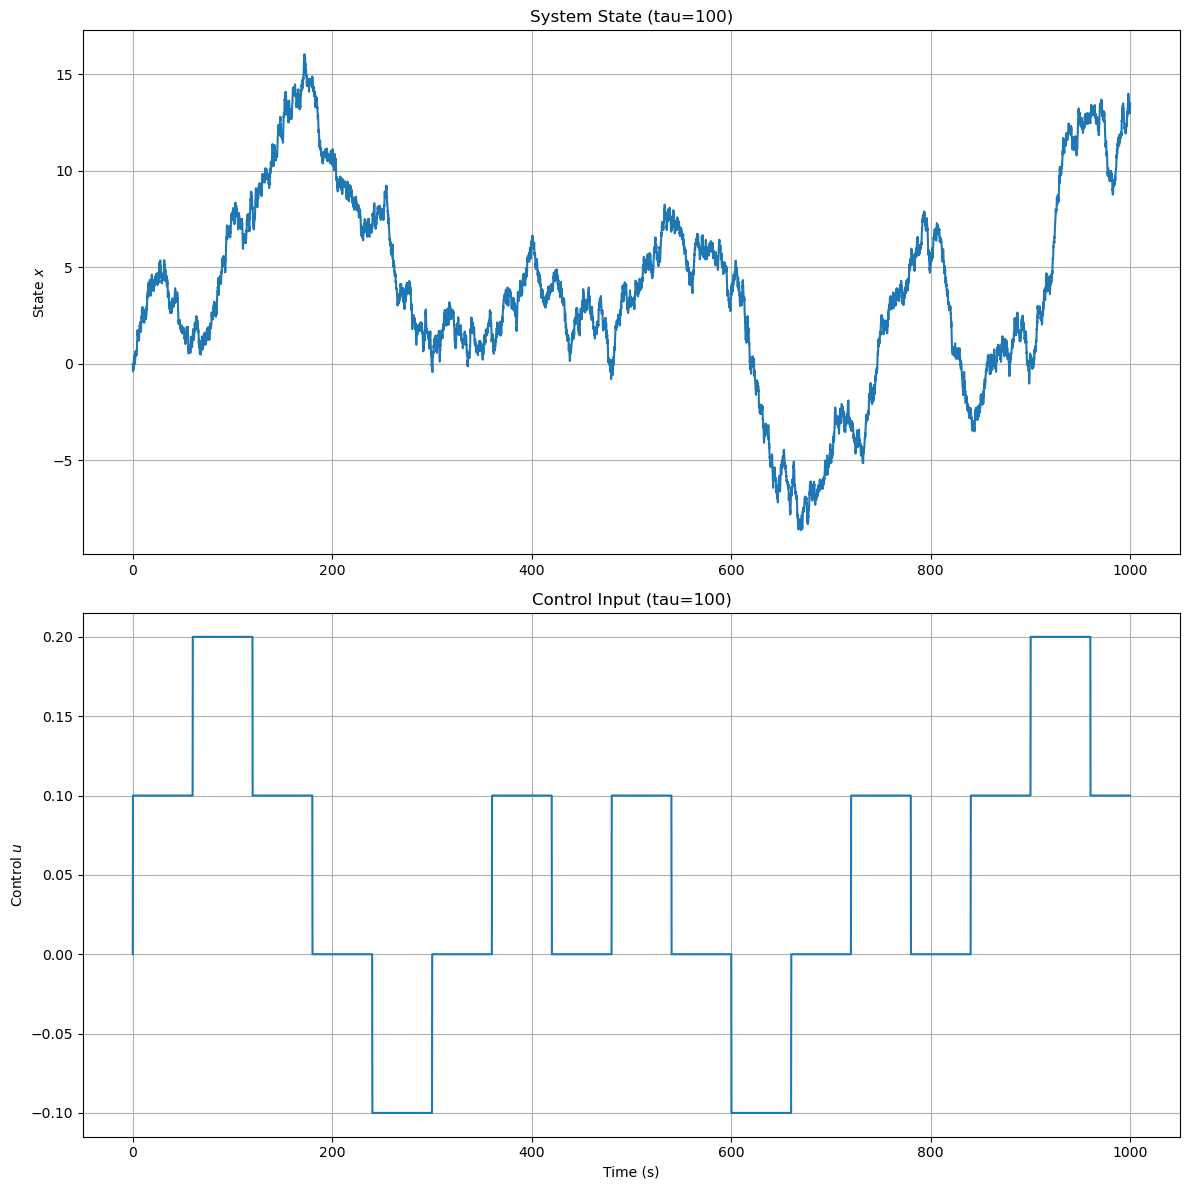

In [45]:
### Generates individual trajectory plots for system state and control inputs

def system_dynamics(x, u, tau, dt, noise_amplitude):
    """Computes the next state of the system with added noise."""
    dx = (-x/tau) + u + np.random.normal(0, noise_amplitude)
    return x + dx * dt

def committee_decision(x, threshold, delta_u, u):
    """Committee adjusts the control input u based on state x."""
    if x < threshold:
        return u + delta_u
    else:
        return u - delta_u

# Parameters
T = 2.0
delta_u = 0.1
dt = 0.1
total_time = 1000
committee_decision_interval = 60
noise_amplitude = 1.5

tau_values = [100]  # Time constant values to simulate

plt.figure(figsize=(12, 6 * len(tau_values) * 2))  # Adjusted figure size

for idx, tau in enumerate(tau_values):
    time_steps = int(total_time / dt)
    times = np.linspace(0, total_time, time_steps)
    x_values = np.zeros(time_steps)
    u_values = np.zeros(time_steps)
    x = 0.0
    u = 0.0

    for i in range(time_steps):
        x_values[i] = x
        u_values[i] = u

        if i % int(committee_decision_interval / dt) == 0:
            u = committee_decision(x, T, delta_u, u)

        x = system_dynamics(x, u, tau, dt, noise_amplitude)

    # Plotting state values
    plt.subplot(2 * len(tau_values), 1, 2 * idx + 1)
    plt.plot(times, x_values)
    plt.title(f"System State (tau={tau})")
    plt.ylabel("State $x$")
    plt.grid(True)

    # Plotting control inputs
    plt.subplot(2 * len(tau_values), 1, 2 * idx + 2)
    plt.plot(times, u_values)
    plt.title(f"Control Input (tau={tau})")
    plt.ylabel("Control $u$")
    plt.grid(True)

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()
